In [1]:
n = 20
teachers_prev = '1847'


# Project description

ddddd


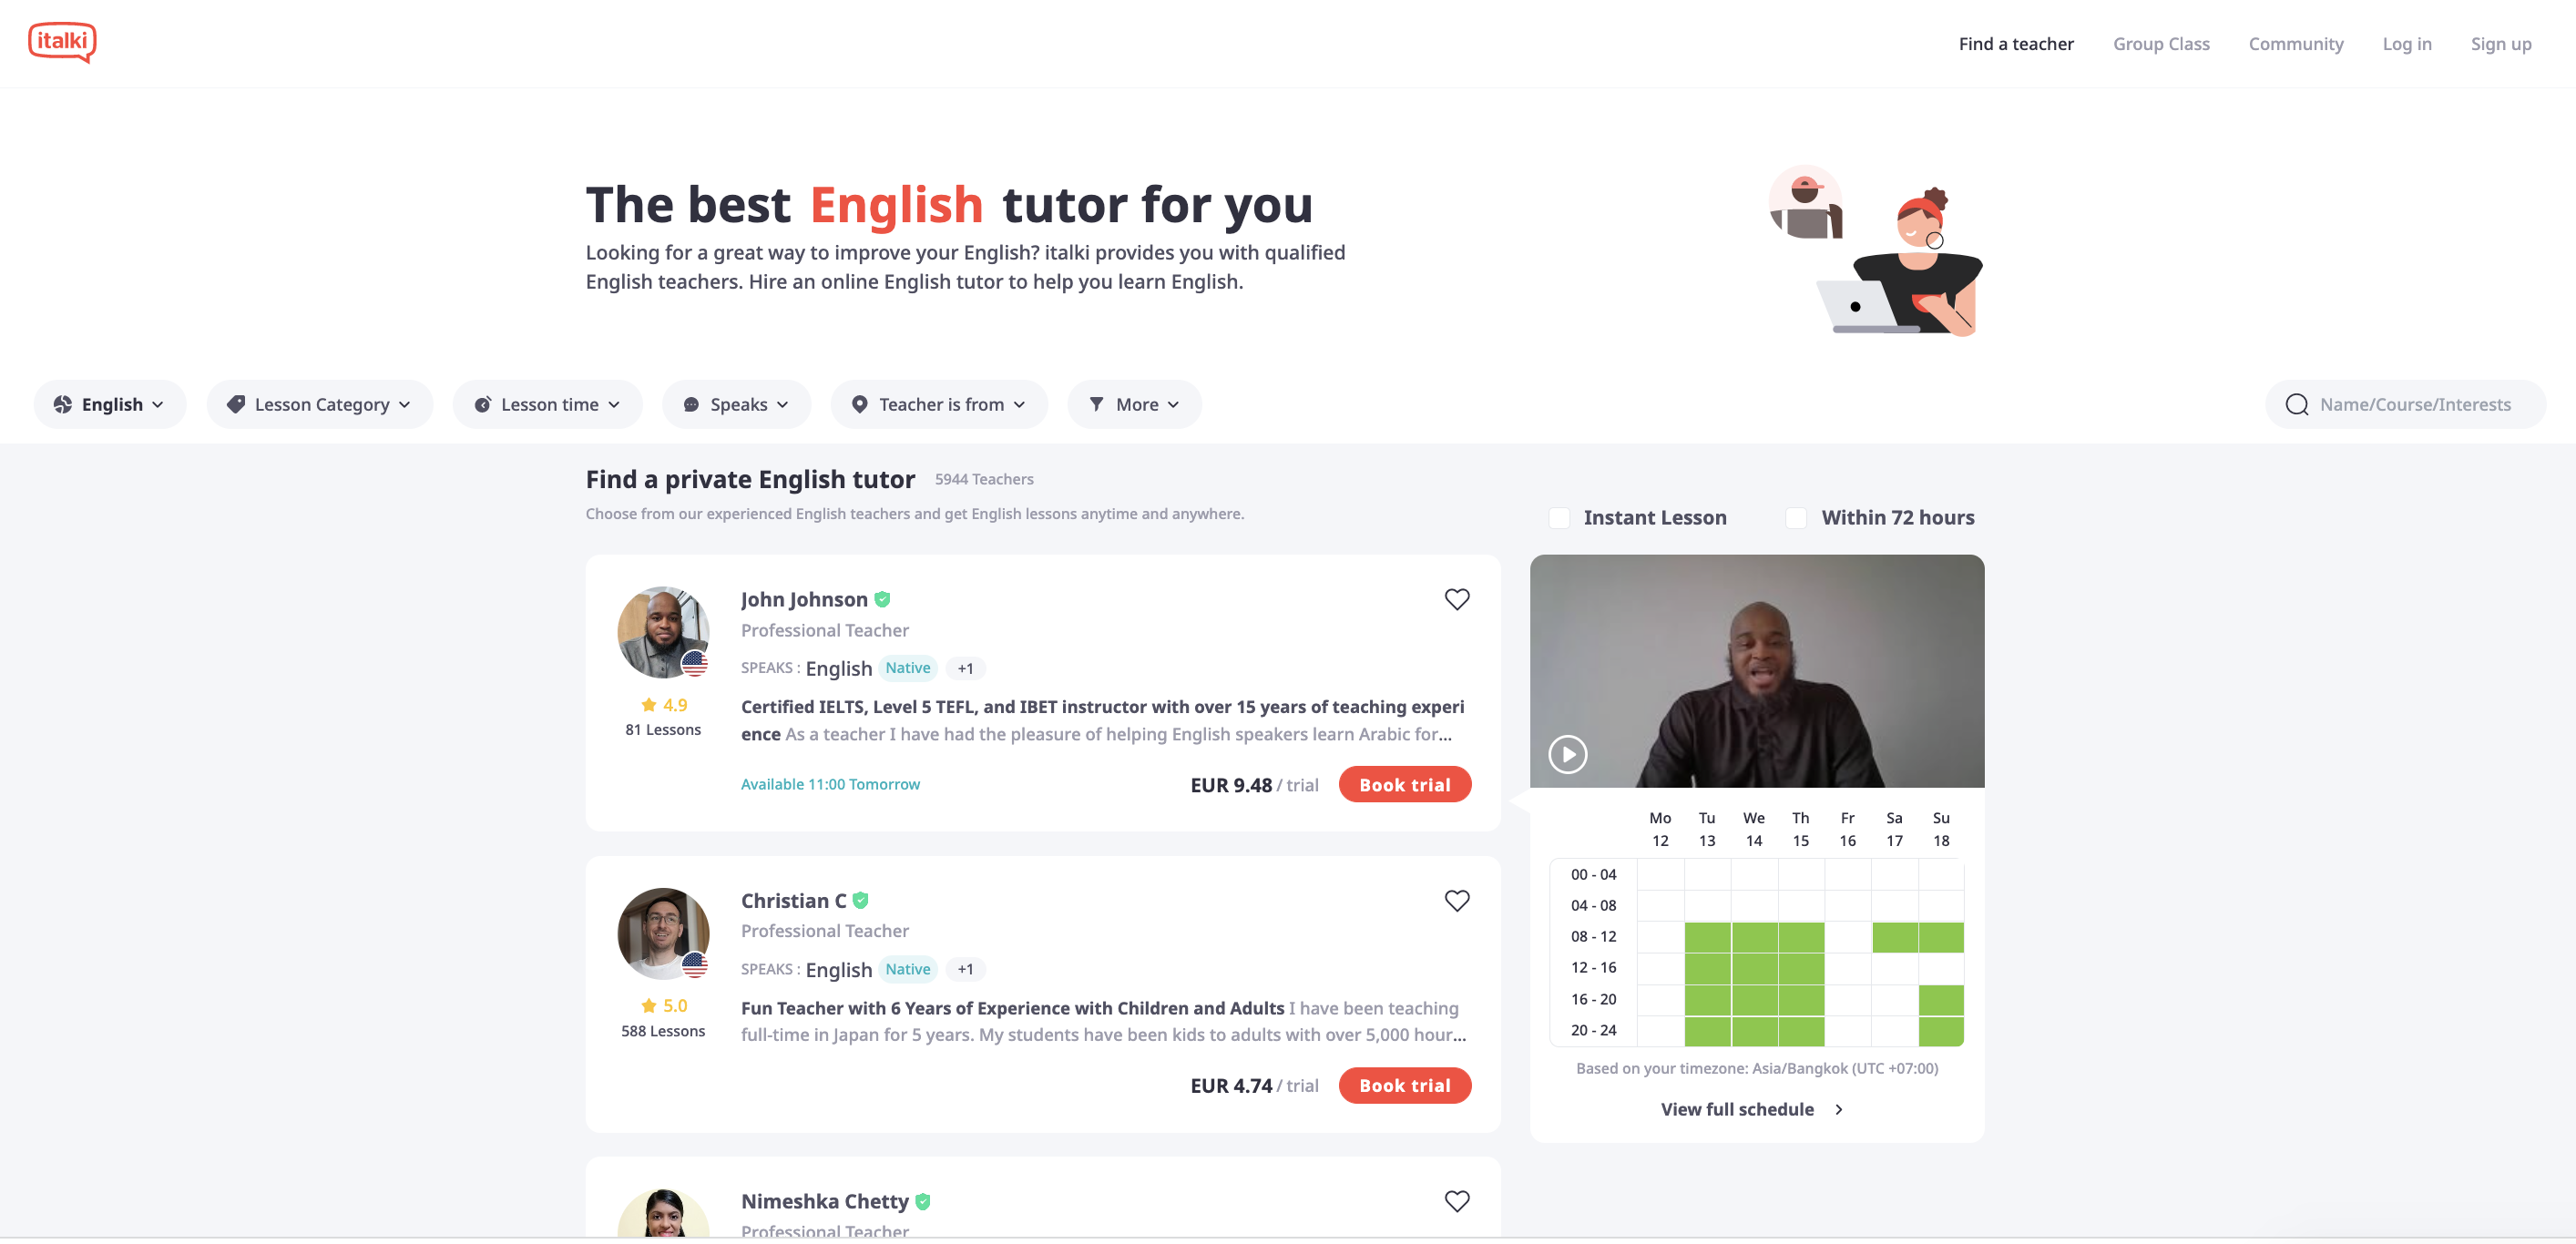

In [2]:
from IPython.display import Image
Image(filename='pics/all_teachers.png')

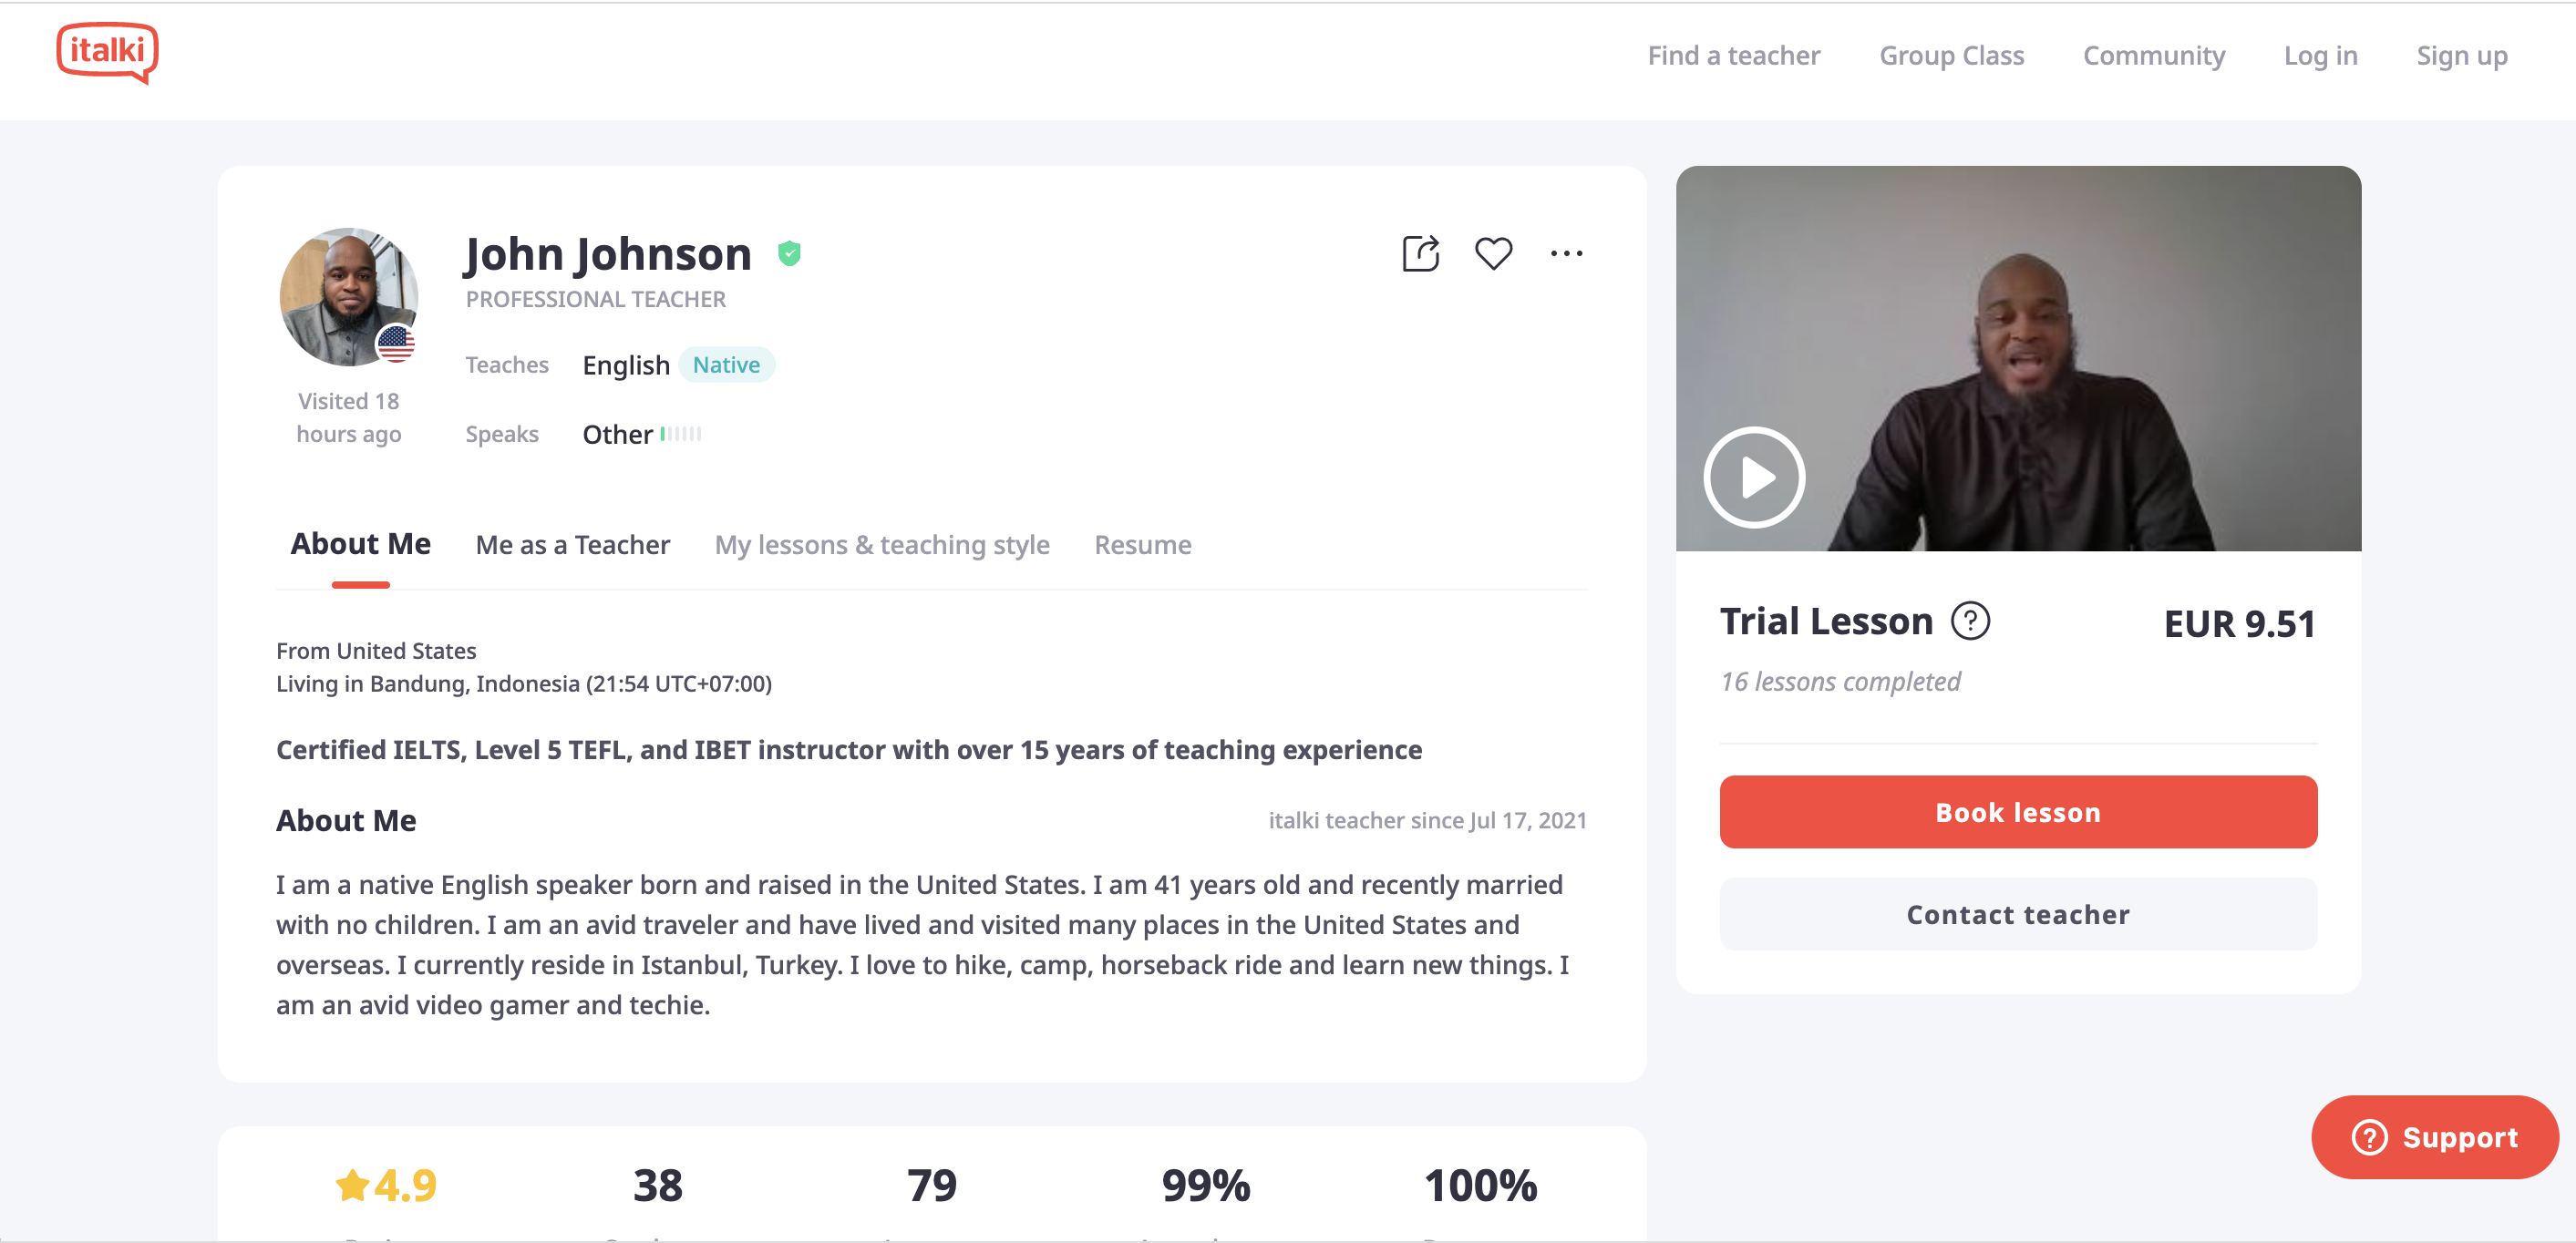

In [3]:
Image(filename='pics/teacher.png')

# Import libraries

Firstly we need to import the necessary packages.

In [4]:
import warnings
warnings.filterwarnings('ignore')

import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#libraries for parsing

import re
from selenium.webdriver.common.by import By
from selenium import webdriver

# 1. Collect data

Firstly, we need to collect all teachers' links.
- Open browser, italki site
- To load all teachers, we should click 'show more' button as many times as possible
- Find all teachers links

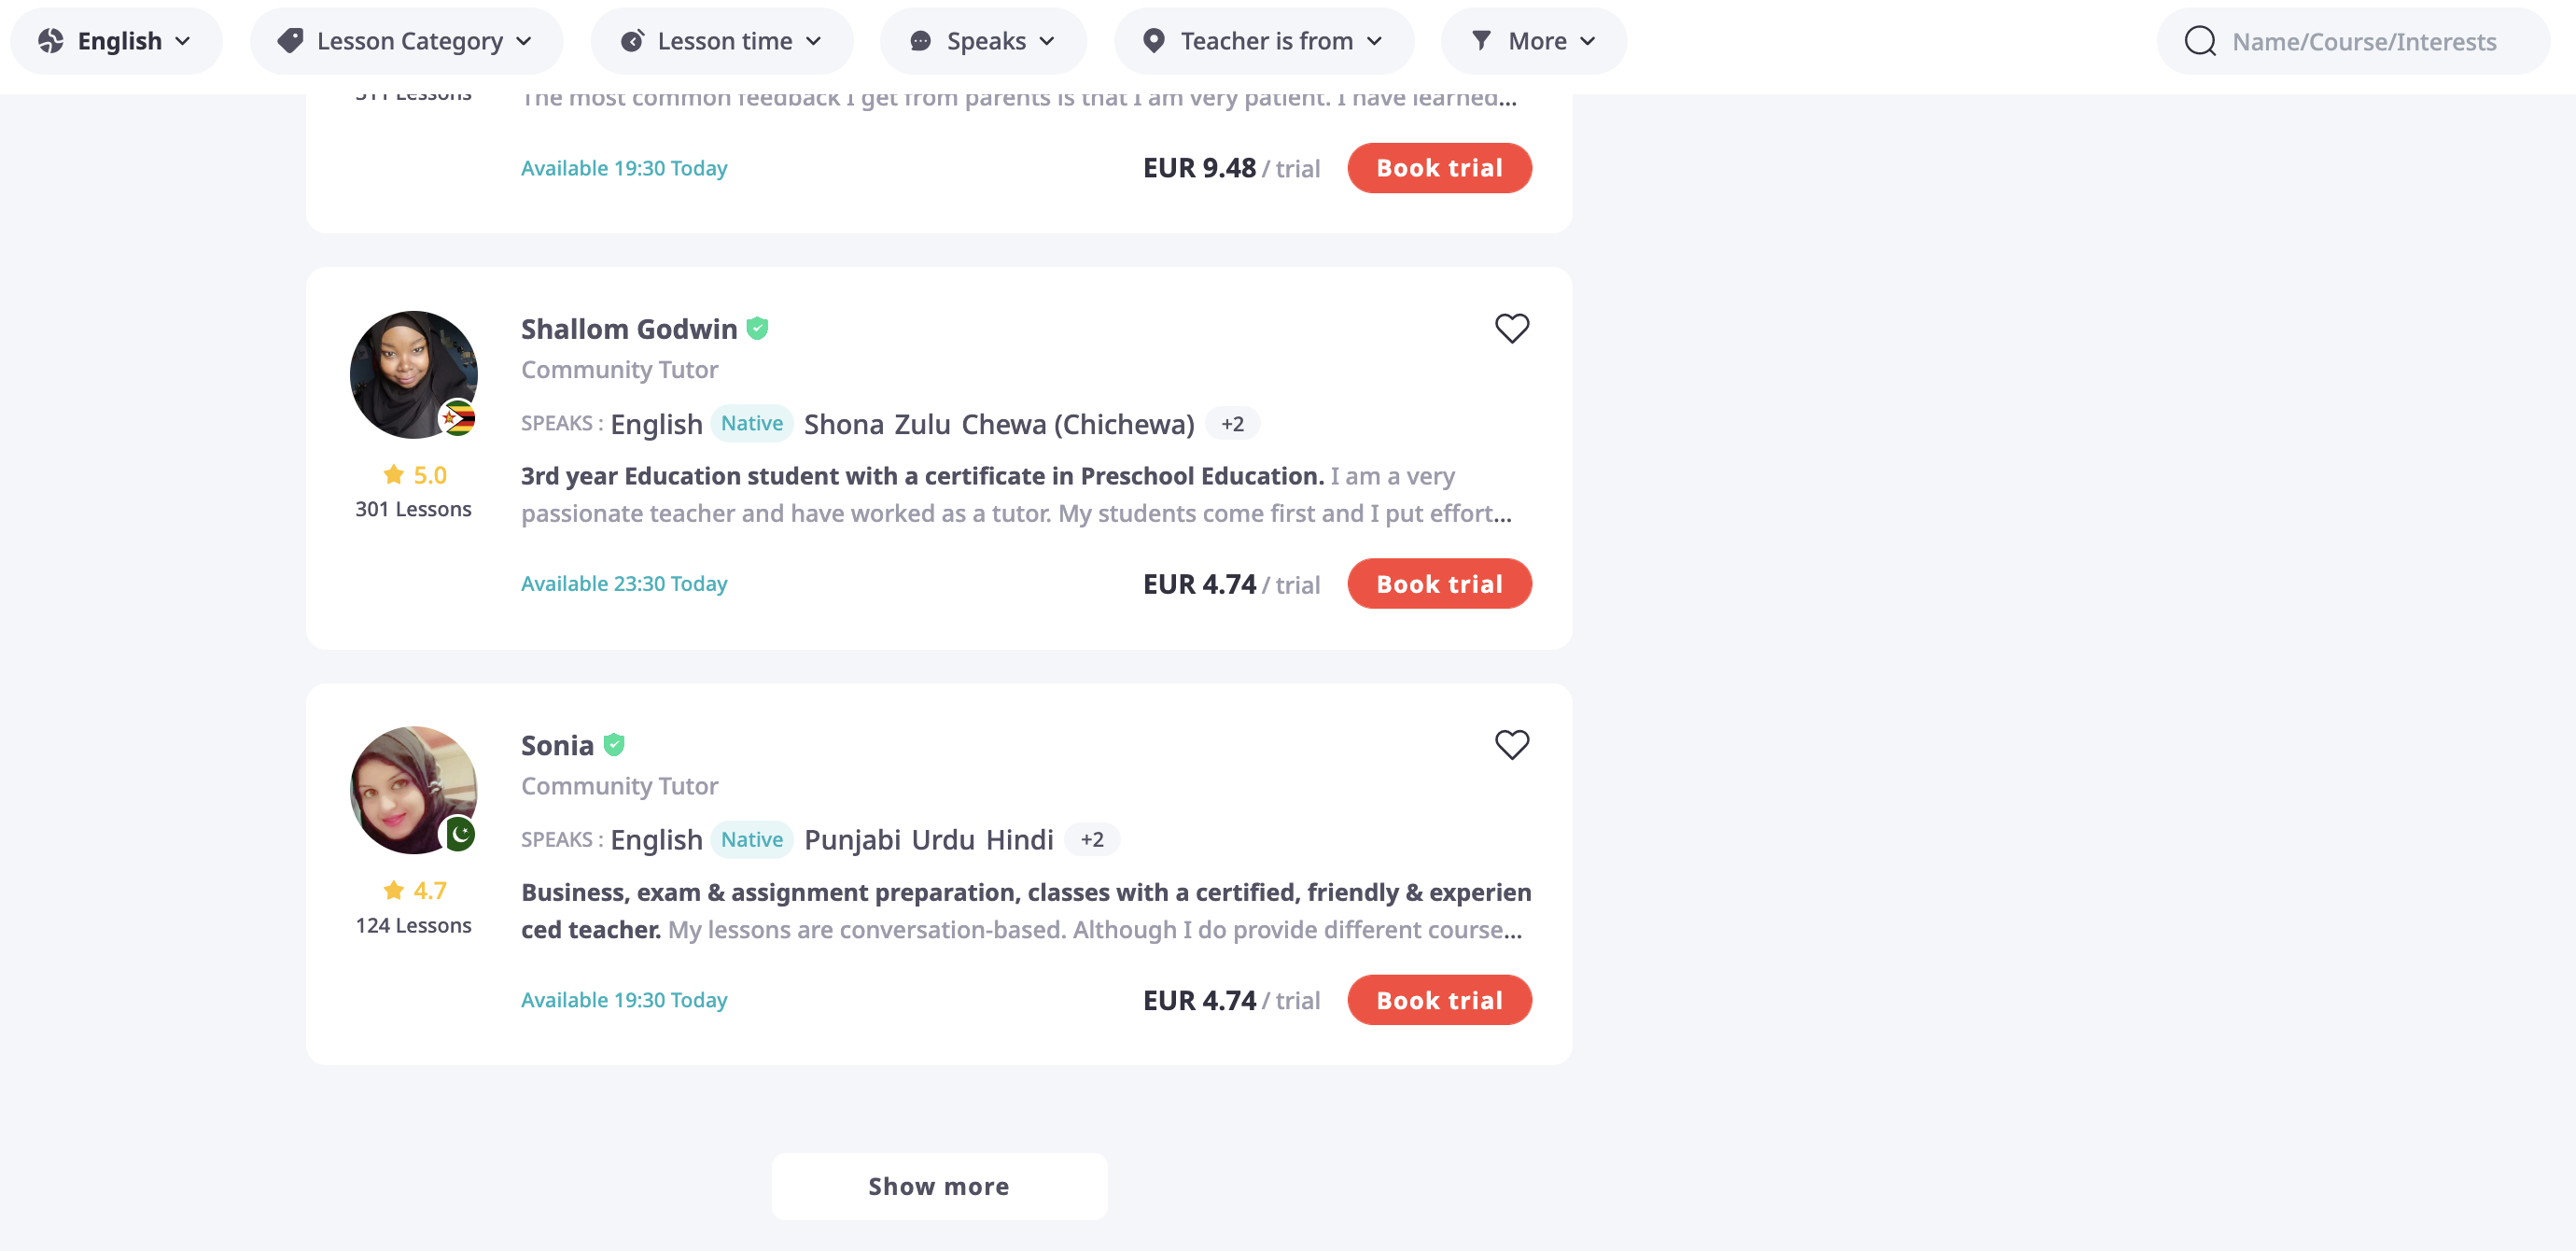

In [6]:
from IPython.display import Image
Image(filename='pics/show_more.png')

In [7]:
# AllTeachersPage locators
class AllTeachersPageLocators:
    TEACHER_LINK_LOCATOR = '//*[@id="teacher-search-list"]/div[3]/div[1]/a'
    SHOW_MORE_LOCATOR = '//*[@id="teacher-search-list"]/div[3]/div[1]/div[3]/button'

In [8]:
# show more and teacher links
class AllTeachersPage:
    def __init__(self, browser):
        self.browser = browser
    
    def teachers_links_list(self):
        locator = AllTeachersPageLocators.TEACHER_LINK_LOCATOR
        all_teachers = self.browser.find_elements(By.XPATH, locator)
        return [teacher.get_attribute("href") for teacher in all_teachers]

    @property
    def show_more_button(self):
        locator = AllTeachersPageLocators.SHOW_MORE_LOCATOR
        return self.browser.find_element(By.XPATH, locator)

In [9]:
driver = webdriver.Chrome(executable_path='/Users/aueva/Desktop/chromedriver')
driver.get('https://www.italki.com/en/teachers/english')

In [10]:
page = AllTeachersPage(driver)

In [11]:
for i in range(100):    
    page.show_more_button.click()
    print(i)
    time.sleep(3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="teacher-search-list"]/div[3]/div[1]/div[3]/button"}
  (Session info: chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x000000010d19bf38 chromedriver + 4910904
1   chromedriver                        0x000000010d11ba03 chromedriver + 4385283
2   chromedriver                        0x000000010cd60747 chromedriver + 472903
3   chromedriver                        0x000000010cda534c chromedriver + 754508
4   chromedriver                        0x000000010cda55a1 chromedriver + 755105
5   chromedriver                        0x000000010cde8e94 chromedriver + 1031828
6   chromedriver                        0x000000010cdcb13d chromedriver + 909629
7   chromedriver                        0x000000010cde628e chromedriver + 1020558
8   chromedriver                        0x000000010cdcaee3 chromedriver + 909027
9   chromedriver                        0x000000010cd9530c chromedriver + 688908
10  chromedriver                        0x000000010cd9688e chromedriver + 694414
11  chromedriver                        0x000000010d1691de chromedriver + 4702686
12  chromedriver                        0x000000010d16db19 chromedriver + 4721433
13  chromedriver                        0x000000010d17528e chromedriver + 4752014
14  chromedriver                        0x000000010d16e91a chromedriver + 4725018
15  chromedriver                        0x000000010d142b02 chromedriver + 4545282
16  chromedriver                        0x000000010d18d888 chromedriver + 4851848
17  chromedriver                        0x000000010d18da05 chromedriver + 4852229
18  chromedriver                        0x000000010d1a3e5f chromedriver + 4943455
19  libsystem_pthread.dylib             0x00007fff204a98fc _pthread_start + 224
20  libsystem_pthread.dylib             0x00007fff204a5443 thread_start + 15


In [12]:
teachers_links_series = pd.Series(page.teachers_links_list())
print(teachers_links_series.shape)

(1980,)


In [13]:
teachers_links_series.to_csv(f'teachers_{n}.csv', index=False, header=False)
teachers_links_series.to_csv(f'teachers_{n}_copy.csv', index=False, header=False)

## delete lately

### Load previous data and concat them with new one.
Drop duplicates.

In [14]:
# delete lately
teachers_links_df_2 = pd.read_csv(f'teachers_{teachers_prev}.csv')
#teachers_links_df_2 = pd.read_csv(f'teachers_{teachers_prev}_new.csv')
teachers_links_df_2.head()

,link,teacher_type,is_native,languages,about_info,since_date,main_info,country_from,country_living,rating,students_num,lessons_num,attendance,response,target,teacher_style,lessons_style,resume,reviews_num
0,https://www.italki.com/en/teacher/9453623/english,PROFESSIONAL TEACHER,Teaches\nEnglish\nNative,['Other'],I am a native English speaker born and raised ...,"italki teacher since Jul 17, 2021","Certified IELTS, Level 5 TEFL, and IBET instru...",From United States,"Living in Bandung, Indonesia (17:09 UTC+07:00)",4.9,38,79,99%,100%,USD 10.00,As a teacher I have had the pleasure of helpin...,In my lessons I give the student a foundation ...,IELTS IELTS Operations Australia 2022\nCertifi...,12 Reviews
1,https://www.italki.com/en/teacher/12009826/eng...,PROFESSIONAL TEACHER,Teaches\nEnglish\nNative,"['Spanish', 'Other']","Hello, I'm Rachel from England but I now and l...","italki teacher since Jan 27, 2022",Certified TEFL Teacher with 10 years teaching ...,From United Kingdom,"Living in Alacant, Spain (11:09 UTC+01:00)",5.0,35,161,100%,99%,USD 5.00,For me it is important that my students enjoy ...,For the structured lessons we use the Cambridg...,TEFL The TEFL Academy 2015\nCertificate uploaded,12 Reviews
2,https://www.italki.com/en/teacher/3011731/english,COMMUNITY TUTOR,Teaches\nEnglish\nNative\nSpanish,"['Arabic', 'Indonesian']","I'm originally from the US, though today I pre...","italki teacher since Aug 30, 2016","I'm originally from the US, though today I pre...",From United States,"Living in Tucheng, Taiwan (18:09 UTC+08:00)",4.7,546,735,99%,98%,USD 5.00,I've been teaching on italki for about 2 years...,My lessons are mostly conversational and light...,NaN,157 Reviews
3,https://www.italki.com/en/teacher/10883180/eng...,COMMUNITY TUTOR,Teaches\nEnglish\nNative,['Other'],"My name is Yondela, I am a Bsc (Biochemistry, ...","italki teacher since Oct 22, 2021",BSc graduate with 1 year of experience as an o...,From South Africa,"Living in Nelson Mandela, South Africa (12:09 ...",4.9,20,34,97%,100%,USD 5.00,I am a patient and understanding teacher. I ha...,"In my lessons we will use magazines, pictures,...",NaN,5 Reviews
4,https://www.italki.com/en/teacher/9779566/english,COMMUNITY TUTOR,Teaches\nEnglish\nNative,[],Hi ! My name is Ayanda from a beautiful countr...,"italki teacher since Oct 27, 2021",certified TEFL teacher (ADULT & CHILDREN),From South Africa,"Living in Ethekwini, South Africa (12:10 UTC+0...",4.9,90,162,99%,100%,USD 5.00,"I am a very patient and understanding person ,...",My teaching style will be interactive and supp...,NaN,40 Reviews


In [15]:
teachers_links_df_2.shape

(1847, 19)

In [16]:
teachers_links_df_2[teachers_links_df_2.since_date.isna()]

,link,teacher_type,is_native,languages,about_info,since_date,main_info,country_from,country_living,rating,students_num,lessons_num,attendance,response,target,teacher_style,lessons_style,resume,reviews_num


In [17]:
# delete lately
# teachers_links_df = pd.DataFrame(teachers_links_series, columns=['link'])
# all_teachers_df = teachers_links_df


teachers_links_df = pd.DataFrame(teachers_links_series, columns=['link'])
teachers_links_df[teachers_links_df_2.columns[1:]] = None
teachers_links_df

,link,teacher_type,is_native,languages,about_info,since_date,main_info,country_from,country_living,rating,students_num,lessons_num,attendance,response,target,teacher_style,lessons_style,resume,reviews_num
0,https://www.italki.com/en/teacher/3895310/english,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,https://www.italki.com/en/teacher/12832441/eng...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,https://www.italki.com/en/teacher/4295384/english,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,https://www.italki.com/en/teacher/11512547/eng...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,https://www.italki.com/en/teacher/8610270/english,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,https://www.italki.com/en/teacher/11346601/eng...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1976,https://www.italki.com/en/teacher/1255893/english,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1977,https://www.italki.com/en/teacher/8071608/english,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1978,https://www.italki.com/en/teacher/5575637/english,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [18]:
# delete lately
all_teachers_df = pd.concat([teachers_links_df_2, teachers_links_df])
all_teachers_df.shape

(3827, 19)

In [19]:
# delete lately
all_teachers_df.head(2)

,link,teacher_type,is_native,languages,about_info,since_date,main_info,country_from,country_living,rating,students_num,lessons_num,attendance,response,target,teacher_style,lessons_style,resume,reviews_num
0,https://www.italki.com/en/teacher/9453623/english,PROFESSIONAL TEACHER,Teaches\nEnglish\nNative,['Other'],I am a native English speaker born and raised ...,"italki teacher since Jul 17, 2021","Certified IELTS, Level 5 TEFL, and IBET instru...",From United States,"Living in Bandung, Indonesia (17:09 UTC+07:00)",4.9,38,79,99%,100%,USD 10.00,As a teacher I have had the pleasure of helpin...,In my lessons I give the student a foundation ...,IELTS IELTS Operations Australia 2022\nCertifi...,12 Reviews
1,https://www.italki.com/en/teacher/12009826/eng...,PROFESSIONAL TEACHER,Teaches\nEnglish\nNative,"['Spanish', 'Other']","Hello, I'm Rachel from England but I now and l...","italki teacher since Jan 27, 2022",Certified TEFL Teacher with 10 years teaching ...,From United Kingdom,"Living in Alacant, Spain (11:09 UTC+01:00)",5.0,35,161,100%,99%,USD 5.00,For me it is important that my students enjoy ...,For the structured lessons we use the Cambridg...,TEFL The TEFL Academy 2015\nCertificate uploaded,12 Reviews


In [20]:
all_teachers_df.drop_duplicates(subset = ['link'], inplace=True)
all_teachers_df.index = range(all_teachers_df.shape[0])
all_teachers_df.shape

(1884, 19)

In [21]:
all_teachers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   link            1884 non-null   object 
 1   teacher_type    1847 non-null   object 
 2   is_native       1846 non-null   object 
 3   languages       1847 non-null   object 
 4   about_info      1677 non-null   object 
 5   since_date      1847 non-null   object 
 6   main_info       1847 non-null   object 
 7   country_from    1847 non-null   object 
 8   country_living  1847 non-null   object 
 9   rating          1844 non-null   float64
 10  students_num    1844 non-null   object 
 11  lessons_num     1844 non-null   object 
 12  attendance      1844 non-null   object 
 13  response        1844 non-null   object 
 14  target          1847 non-null   object 
 15  teacher_style   1814 non-null   object 
 16  lessons_style   1811 non-null   object 
 17  resume          756 non-null    o

## Insert teachers info

1. link. 
    Teachers link.
2. teacher_type.
    - Professional Teacher. A highly-skilled and qualified teacher who have experience helping students reach their goals.
    - Community Tutor. A native or advanced speaker who helps students through informal tutoring or speaking practice.
3. is_native. <br/>
    Is teacher native english speaker or not.
4. languages. <br/>
    List of languages teacher speakes.
5. about_info. <br/>
    Info about teacher.
6. since_date.<br/>
    Teachs on italki since this date.
7. main_info. <br/>
    Main information about teacher.
8. country_from. <br/>
    Country name teacher is from.
9. country_living. <br/>
    Country name teacher is living now.
10. rating. <br/>
    Techers' rating.
11. students_num. <br/>
    Number of techers' students.
12. lessons_num. <br/>
    Number of techers' lessons.
13. attendance. <br/>
    Percentage of teachers' attendance.
14. response. <br/>
    Percentage of teachers' response.
15. target. <br/>
    Trial lesson price.
16. teacher_style. <br/>
    Info about the person as a teacher.
17. lessons_style. <br/>
    Info about lessons.
18. resume. <br/>
    Resume about teacher.
19. reviews_num. <br/>
    Number of reviews.

In [22]:
# AllTeachersPage locators
teacher_locators_dict_1 = {
    'TEACHER_TYPE': '//*[@id="about_me"]/div[1]/div[1]/div[2]/div[2]',
    'IS_NATIVE': '//*[@id="about_me"]/div[1]/div[1]/div[2]/div[3]/div[1]',
    'MAIN_INFO':  '//*[@id="readmore"]/div[2]/div[1]/div/div[2]/span',
    'COUNTRY_FROM': '//*[@id="readmore"]/div[2]/div[1]/div/div[1]/span[1]',
    'COUNTRY_LIVING': '//*[@id="readmore"]/div[2]/div[1]/div/div[1]/span[2]',
    'RATING': '//*[@id="about_me"]/div[2]/div[1]/div[1]/div[1]/div',
    'STUDENTS_NUM': '//*[@id="about_me"]/div[2]/div[1]/div[2]/div[1]',
    'LESSONS_NUM': '//*[@id="about_me"]/div[2]/div[1]/div[3]/div[1]',
    'ATTENDANCE': '//*[@id="about_me"]/div[2]/div[1]/div[4]/div[1]',
    'RESPONSE': '//*[@id="about_me"]/div[2]/div[1]/div[5]/div[1]',
    'REVIEWS_NUM': '//*[@id="reviews"]/div[1]/h2'
    }
  
teacher_locators_dict_2 = {
    'ABOUT_INFO':['//*[@id="readmore"]/div[2]/div[1]/div/div[3]/span',
                '//*[@id="readmore"]/div[2]/div[1]/div/div[2]/span',
                 '//*[@id="readmore"]/div[2]/div[1]/div/div[2]/span'],
    'SINCE_DATE': ['//*[@id="readmore"]/div[2]/div[1]/div/div[3]/div/span',
                   '//*[@id="readmore"]/div[2]/div[1]/div/div[2]/div/span',
                  '//*[@id="readmore"]/div[2]/div/div/div[2]/div/span'],
    'TARGET': ['//*[@id="__next"]/div/div[2]/div[2]/div/div[2]/div[1]/div[2]',
               '//*[@id="__next"]/div[1]/div[2]/div[2]/div/div/div[1]/div[2]',
              '//*[@id="__next"]/div[1]/div[2]/div[2]/div/div/div[1]/div[2]']
    }

teacher_locators_dict_3 = {    
    'TEACHER_STYLE': ['//*[@id="readmore"]/div[1]/div[1]/div/div/div/div/div[1]/div[2]', 
                      '//*[@id="readmore"]/div[3]/div/div/span'],
    'LESSONS_STYLE': ['//*[@id="readmore"]/div[1]/div[1]/div/div/div/div/div[1]/div[3]', 
                      '//*[@id="readmore"]/div[4]/div[1]/div/div[1]/span'],
    'RESUME': ['//*[@id="readmore"]/div[1]/div[1]/div/div/div/div/div[1]/div[4]',
               '//*[@id="readmore"]/div[5]/div/div/div/div/div[2]']
    }

languages_locator =  '//*[@id="about_me"]/div[1]/div[1]/div[2]/div[3]/div[2]/div[2]/div/span'

In [23]:
class Teacher:
    def __init__(self, browser):
        self.browser = browser
    
    def button_click(self, locator_btn):
        try:
            self.browser.find_element(By.XPATH,locator_btn).click()
        except:
            pass
        
    def load_data_text(self, locator):
        try:
            return self.browser.find_element(By.XPATH, locator).text
        except:
            return np.NAN
        
    def load_data_text_2(self, locators):
        try:
            return self.browser.find_element(By.XPATH, locators[0]).text
        except:
            try:
                return self.browser.find_element(By.XPATH, locators[1]).text
            except:
                try:
                    return self.browser.find_element(By.XPATH, locators[2]).text
                except:
                    return np.nan
    
    def load_data_text_btn(self, locator_btn, locator):
        self.button_click(locator_btn)
        return self.load_data_text(locator)
    
    
    def teacher_info_1(self):
        return [self.load_data_text(locator) for locator in teacher_locators_dict_1.values()]

    def teacher_info_2(self):
        return [self.load_data_text_2(locators) for locators in teacher_locators_dict_2.values()]
       
    
    def teacher_info_3(self):
        return [self.load_data_text_btn(*locators) for locators in teacher_locators_dict_3.values()]
    
    def languages(self):
        try:
            return [x.text for x in self.browser.find_elements(By.XPATH, languages_locator)]
        except:
            return [x.text for x in self.browser.find_elements(By.XPATH, languages_locator_2)]
    
    def teacher_info(self):
        return self.teacher_info_1() + self.teacher_info_2() + self.teacher_info_3() + [self.languages()]

In [24]:
teacher_links_df = all_teachers_df.copy()

In [25]:
#for row in range(teacher_links_df.shape[0]):
for row in range(teachers_links_df_2.shape[0], all_teachers_df.shape[0]):

    teacher_url = all_teachers_df.link[row]
    
    driver = webdriver.Chrome(executable_path='/Users/aueva/Desktop/chromedriver')
    driver.get(teacher_url)

    page = Teacher(driver)

    all_teachers_df.loc[row,['teacher_type', 'is_native','main_info', 'country_from',
                             'country_living', 'rating', 'students_num', 'lessons_num', 
                             'attendance', 'response','reviews_num', 
                             'about_info', 'since_date','target',
                             'teacher_style', 'lessons_style', 'resume', 
                             'languages']] = page.teacher_info()
                             
    
    driver.close()
    print(row)

1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883


In [26]:
all_teachers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   link            1884 non-null   object
 1   teacher_type    1884 non-null   object
 2   is_native       1883 non-null   object
 3   languages       1884 non-null   object
 4   about_info      1714 non-null   object
 5   since_date      1884 non-null   object
 6   main_info       1884 non-null   object
 7   country_from    1884 non-null   object
 8   country_living  1884 non-null   object
 9   rating          1880 non-null   object
 10  students_num    1880 non-null   object
 11  lessons_num     1880 non-null   object
 12  attendance      1880 non-null   object
 13  response        1880 non-null   object
 14  target          1884 non-null   object
 15  teacher_style   1850 non-null   object
 16  lessons_style   1846 non-null   object
 17  resume          770 non-null    object
 18  reviews_

In [27]:
all_teachers_df

,link,teacher_type,is_native,languages,about_info,since_date,main_info,country_from,country_living,rating,students_num,lessons_num,attendance,response,target,teacher_style,lessons_style,resume,reviews_num
0,https://www.italki.com/en/teacher/9453623/english,PROFESSIONAL TEACHER,Teaches\nEnglish\nNative,['Other'],I am a native English speaker born and raised ...,"italki teacher since Jul 17, 2021","Certified IELTS, Level 5 TEFL, and IBET instru...",From United States,"Living in Bandung, Indonesia (17:09 UTC+07:00)",4.9,38,79,99%,100%,USD 10.00,As a teacher I have had the pleasure of helpin...,In my lessons I give the student a foundation ...,IELTS IELTS Operations Australia 2022\nCertifi...,12 Reviews
1,https://www.italki.com/en/teacher/12009826/eng...,PROFESSIONAL TEACHER,Teaches\nEnglish\nNative,"['Spanish', 'Other']","Hello, I'm Rachel from England but I now and l...","italki teacher since Jan 27, 2022",Certified TEFL Teacher with 10 years teaching ...,From United Kingdom,"Living in Alacant, Spain (11:09 UTC+01:00)",5.0,35,161,100%,99%,USD 5.00,For me it is important that my students enjoy ...,For the structured lessons we use the Cambridg...,TEFL The TEFL Academy 2015\nCertificate uploaded,12 Reviews
2,https://www.italki.com/en/teacher/3011731/english,COMMUNITY TUTOR,Teaches\nEnglish\nNative\nSpanish,"['Arabic', 'Indonesian']","I'm originally from the US, though today I pre...","italki teacher since Aug 30, 2016","I'm originally from the US, though today I pre...",From United States,"Living in Tucheng, Taiwan (18:09 UTC+08:00)",4.7,546,735,99%,98%,USD 5.00,I've been teaching on italki for about 2 years...,My lessons are mostly conversational and light...,NaN,157 Reviews
3,https://www.italki.com/en/teacher/10883180/eng...,COMMUNITY TUTOR,Teaches\nEnglish\nNative,['Other'],"My name is Yondela, I am a Bsc (Biochemistry, ...","italki teacher since Oct 22, 2021",BSc graduate with 1 year of experience as an o...,From South Africa,"Living in Nelson Mandela, South Africa (12:09 ...",4.9,20,34,97%,100%,USD 5.00,I am a patient and understanding teacher. I ha...,"In my lessons we will use magazines, pictures,...",NaN,5 Reviews
4,https://www.italki.com/en/teacher/9779566/english,COMMUNITY TUTOR,Teaches\nEnglish\nNative,[],Hi ! My name is Ayanda from a beautiful countr...,"italki teacher since Oct 27, 2021",certified TEFL teacher (ADULT & CHILDREN),From South Africa,"Living in Ethekwini, South Africa (12:10 UTC+0...",4.9,90,162,99%,100%,USD 5.00,"I am a very patient and understanding person ,...",My teaching style will be interactive and supp...,NaN,40 Reviews
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,https://www.italki.com/en/teacher/1771339/english,PROFESSIONAL TEACHER,Teaches\nEnglish\nNative\nJapanese,[Indonesian],I am an American who has been teaching languag...,"italki teacher since Apr 12, 2017",I am an American who has been teaching languag...,From United States,"Living in Other, Japan (16:26 UTC+09:00)",4.8,408,"1,236",100%,99%,USD 10.00,"These are YOUR lessons, so I provide you as mu...",NaN,NaN,200 Reviews
1880,https://www.italki.com/en/teacher/5671170/english,COMMUNITY TUTOR,Teaches\nEnglish\nNative\nFilipino (Tagalog)\n...,"[Chinese (Mandarin), Korean]","Hi! I’m Neya, a girl from the highland region ...","italki teacher since Aug 31, 2020",TESOL/ TEFL certified with over 6 yrs. of expe...,From Philippines,"Living in Baguio, Philippines (15:26 UTC+08:00)",5.0,144,748,100%,100%,USD 6.00,I have been teaching for about five years and ...,"My classes are always fun and engaging, and my...",NaN,134 Reviews
1881,https://www.italki.com/en/teacher/4357149/english,PROFESSIONAL TEACHER,Teaches\nSpanish\nNative\nEnglish,"[Croatian, Dutch, Italian, Portuguese, German]",Hi! I'm Sebastian and I'm very happy to be you...,"italki teacher since Aug 30, 2017",Certified English ans Spanish teacher with +12...,From Chile,"Living in Zagreb, Croatia (08:26 UTC+01:00)",5.0,200,987,100%,100%,USD 8.00,We wil

In [28]:
all_teachers_df.to_csv(f'teachers_{all_teachers_df.shape[0]}.csv', index=False)
all_teachers_df.to_csv(f'teachers_{all_teachers_df.shape[0]}_copy.csv', index=False)

In [29]:

pd.read_csv(f'teachers_{teacher_links_df.shape[0]}.csv')

,link,teacher_type,is_native,languages,about_info,since_date,main_info,country_from,country_living,rating,students_num,lessons_num,attendance,response,target,teacher_style,lessons_style,resume,reviews_num
0,https://www.italki.com/en/teacher/9453623/english,PROFESSIONAL TEACHER,Teaches\nEnglish\nNative,['Other'],I am a native English speaker born and raised ...,"italki teacher since Jul 17, 2021","Certified IELTS, Level 5 TEFL, and IBET instru...",From United States,"Living in Bandung, Indonesia (17:09 UTC+07:00)",4.9,38,79,99%,100%,USD 10.00,As a teacher I have had the pleasure of helpin...,In my lessons I give the student a foundation ...,IELTS IELTS Operations Australia 2022\nCertifi...,12 Reviews
1,https://www.italki.com/en/teacher/12009826/eng...,PROFESSIONAL TEACHER,Teaches\nEnglish\nNative,"['Spanish', 'Other']","Hello, I'm Rachel from England but I now and l...","italki teacher since Jan 27, 2022",Certified TEFL Teacher with 10 years teaching ...,From United Kingdom,"Living in Alacant, Spain (11:09 UTC+01:00)",5.0,35,161,100%,99%,USD 5.00,For me it is important that my students enjoy ...,For the structured lessons we use the Cambridg...,TEFL The TEFL Academy 2015\nCertificate uploaded,12 Reviews
2,https://www.italki.com/en/teacher/3011731/english,COMMUNITY TUTOR,Teaches\nEnglish\nNative\nSpanish,"['Arabic', 'Indonesian']","I'm originally from the US, though today I pre...","italki teacher since Aug 30, 2016","I'm originally from the US, though today I pre...",From United States,"Living in Tucheng, Taiwan (18:09 UTC+08:00)",4.7,546,735,99%,98%,USD 5.00,I've been teaching on italki for about 2 years...,My lessons are mostly conversational and light...,NaN,157 Reviews
3,https://www.italki.com/en/teacher/10883180/eng...,COMMUNITY TUTOR,Teaches\nEnglish\nNative,['Other'],"My name is Yondela, I am a Bsc (Biochemistry, ...","italki teacher since Oct 22, 2021",BSc graduate with 1 year of experience as an o...,From South Africa,"Living in Nelson Mandela, South Africa (12:09 ...",4.9,20,34,97%,100%,USD 5.00,I am a patient and understanding teacher. I ha...,"In my lessons we will use magazines, pictures,...",NaN,5 Reviews
4,https://www.italki.com/en/teacher/9779566/english,COMMUNITY TUTOR,Teaches\nEnglish\nNative,[],Hi ! My name is Ayanda from a beautiful countr...,"italki teacher since Oct 27, 2021",certified TEFL teacher (ADULT & CHILDREN),From South Africa,"Living in Ethekwini, South Africa (12:10 UTC+0...",4.9,90,162,99%,100%,USD 5.00,"I am a very patient and understanding person ,...",My teaching style will be interactive and supp...,NaN,40 Reviews
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,https://www.italki.com/en/teacher/1771339/english,PROFESSIONAL TEACHER,Teaches\nEnglish\nNative\nJapanese,['Indonesian'],I am an American who has been teaching languag...,"italki teacher since Apr 12, 2017",I am an American who has been teaching languag...,From United States,"Living in Other, Japan (16:26 UTC+09:00)",4.8,408,"1,236",100%,99%,USD 10.00,"These are YOUR lessons, so I provide you as mu...",NaN,NaN,200 Reviews
1880,https://www.italki.com/en/teacher/5671170/english,COMMUNITY TUTOR,Teaches\nEnglish\nNative\nFilipino (Tagalog)\n...,"['Chinese (Mandarin)', 'Korean']","Hi! I’m Neya, a girl from the highland region ...","italki teacher since Aug 31, 2020",TESOL/ TEFL certified with over 6 yrs. of expe...,From Philippines,"Living in Baguio, Philippines (15:26 UTC+08:00)",5.0,144,748,100%,100%,USD 6.00,I have been teaching for about five years and ...,"My classes are always fun and engaging, and my...",NaN,134 Reviews
1881,https://www.italki.com/en/teacher/4357149/english,PROFESSIONAL TEACHER,Teaches\nSpanish\nNative\nEnglish,"['Croatian', 'Dutch', 'Italian', 'Portuguese',...",Hi! I'm Sebastian and I'm very happy to be you...,"italki teacher since Aug 30, 2017",Certified English ans Spanish teacher with +12...,From Chile,"Living in Zagreb, Croatia (08:26 UTC+01:00)",5.0,200,987,100%,100%,USD 8.